In [1]:
import pandas as pd

# Cargar el dataset a analizar
clima_full = pd.read_csv("..\data\processed\preprocessed_clima_full.csv")

# Mostrar el dataset
clima_full.head()

,Unnamed: 0,NAME,STATION,DATE,year,month,day,TMIN,TMAX,TAVG,PRCP,SNWD
0,0,"MENDOZA AERO, AR",AR000087418,1957-06-30,1957,6,30,-4.2,9.8,2.8,0.0,0.0
1,1,"MENDOZA AERO, AR",AR000087418,1957-07-01,1957,7,1,-3.5,10.5,3.5,0.0,0.0
2,2,"MENDOZA AERO, AR",AR000087418,1957-07-02,1957,7,2,-2.3,11.7,4.7,0.0,0.0
3,3,"MENDOZA AERO, AR",AR000087418,1957-07-03,1957,7,3,-0.9,13.1,6.1,0.0,0.0
4,4,"MENDOZA AERO, AR",AR000087418,1957-07-04,1957,7,4,0.3,14.3,7.3,0.0,0.0


In [2]:
clima_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24122 entries, 0 to 24121
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24122 non-null  int64  
 1   NAME        24122 non-null  object 
 2   STATION     24122 non-null  object 
 3   DATE        24122 non-null  object 
 4   year        24122 non-null  int64  
 5   month       24122 non-null  int64  
 6   day         24122 non-null  int64  
 7   TMIN        24122 non-null  float64
 8   TMAX        24122 non-null  float64
 9   TAVG        24122 non-null  float64
 10  PRCP        24122 non-null  float64
 11  SNWD        24122 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 2.2+ MB


In [3]:
# ELiminar la columna "Unnamed: 0"
clima_full.drop(columns=["Unnamed: 0", "NAME", "STATION", "year", "month", "day"], inplace=True)

# Cambiar los nombres de las columnas
clima_full.rename(columns={'DATE':'date', 'TMIN':'tmin', 'TMAX':'tmax', 'TAVG':'tavg', 'PRCP':'precipitation', 'SNWD':'snowfall'}, inplace=True)

# Transformar datos de la columna 'date' en tipo datetime
clima_full['date'] = pd.to_datetime(clima_full['date'])

# Desglozamos la columna date para tener una mejor perspectiva predictiva
clima_full['year'] = clima_full['date'].dt.year
clima_full['month'] = clima_full['date'].dt.month
clima_full['day'] = clima_full['date'].dt.day

# Función para determinar la estación del año en Argentina
def get_season(date):
    if date >= pd.Timestamp(year=date.year, month=12, day=21) and date <= pd.Timestamp(year=date.year, month=3, day=20):
        return 'summer'
    elif date >= pd.Timestamp(year=date.year, month=3, day=21) and date <= pd.Timestamp(year=date.year, month=6, day=20):
        return 'autumn'
    elif date >= pd.Timestamp(year=date.year, month=6, day=21) and date <= pd.Timestamp(year=date.year, month=9, day=20):
        return 'winter'
    elif date >= pd.Timestamp(year=date.year, month=9, day=21) and date <= pd.Timestamp(year=date.year, month=12, day=20):
        return 'spring'

# aplicar la función a la columna 'season'
clima_full['season'] = clima_full['date'].apply(get_season)

# Function to determine the phenology cycle based on the month in Argentina
def get_phenology_cycle(date):
    month = date.month
    if month in [6, 7, 8]:
        return 'Reposo invernal'
    elif month == 9:
        return 'Brotacion'
    elif month in [10, 11]:
        return 'Floracion'
    elif month in [11, 12]:
        return 'Cuajado'
    elif month in [1, 2]:
        return 'Envero'
    elif month in [2, 3, 4]:
        return 'Cosecha'
    else:
        return 'Fuera del ciclo tipico'  # Esto maneja cualquier caso no cubierto explícitamente

# Apply the function to the date column
clima_full['phenology_cycle'] = clima_full['date'].apply(get_phenology_cycle)

# Cambiamos la posición de las columnas
clima_full = clima_full[["date", "year", "month", "day", "season", "phenology_cycle", "tmin", "tmax", "tavg", "precipitation", "snowfall"]]

clima_full.head()

,date,year,month,day,season,phenology_cycle,tmin,tmax,tavg,precipitation,snowfall
0,1957-06-30,1957,6,30,winter,Reposo invernal,-4.2,9.8,2.8,0.0,0.0
1,1957-07-01,1957,7,1,winter,Reposo invernal,-3.5,10.5,3.5,0.0,0.0
2,1957-07-02,1957,7,2,winter,Reposo invernal,-2.3,11.7,4.7,0.0,0.0
3,1957-07-03,1957,7,3,winter,Reposo invernal,-0.9,13.1,6.1,0.0,0.0
4,1957-07-04,1957,7,4,winter,Reposo invernal,0.3,14.3,7.3,0.0,0.0


In [6]:
clima_full.to_csv("..\data\external\clima_vid.csv", sep=';', decimal=',')

In [5]:
clima_full.describe(include='all')

,date,year,month,day,season,phenology_cycle,tmin,tmax,tavg,precipitation,snowfall
count,24122,24122.000000,24122.000000,24122.000000,18161,24122,24122.000000,24122.000000,24122.000000,24122.000000,24122.000000
unique,NaN,NaN,NaN,NaN,3,7,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,winter,Reposo invernal,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,6070,6072,NaN,NaN,NaN,NaN,NaN
mean,1991-06-08 16:45:17.386618112,1990.934375,6.536647,15.728712,NaN,NaN,10.406882,24.505468,17.318261,0.460716,0.000713
min,1957-06-30 00:00:00,1957.000000,1.000000,1.000000,NaN,NaN,-8.700000,1.300000,-0.500000,0.000000,0.000000
25%,1974-12-11 06:00:00,1974.000000,4.000000,8.000000,NaN,NaN,4.700000,18.800000,11.600000,0.000000,0.000000
50%,1991-06-17 12:00:00,1991.000000,7.000000,16.000000,NaN,NaN,10.600000,24.900000,17.550000,0.000000,0.000000
75%,2007-12-20 18:00:00,2007.000000,10.000000,23.000000,NaN,NaN,16.275000,30.500000,23.200000,0.000000,0.000000
max,2024-07-02 00:00:00,2024.000000,12.000000,31.000000,NaN,NaN,30.100000,44.400000,33.200000,305.100000,6.100000


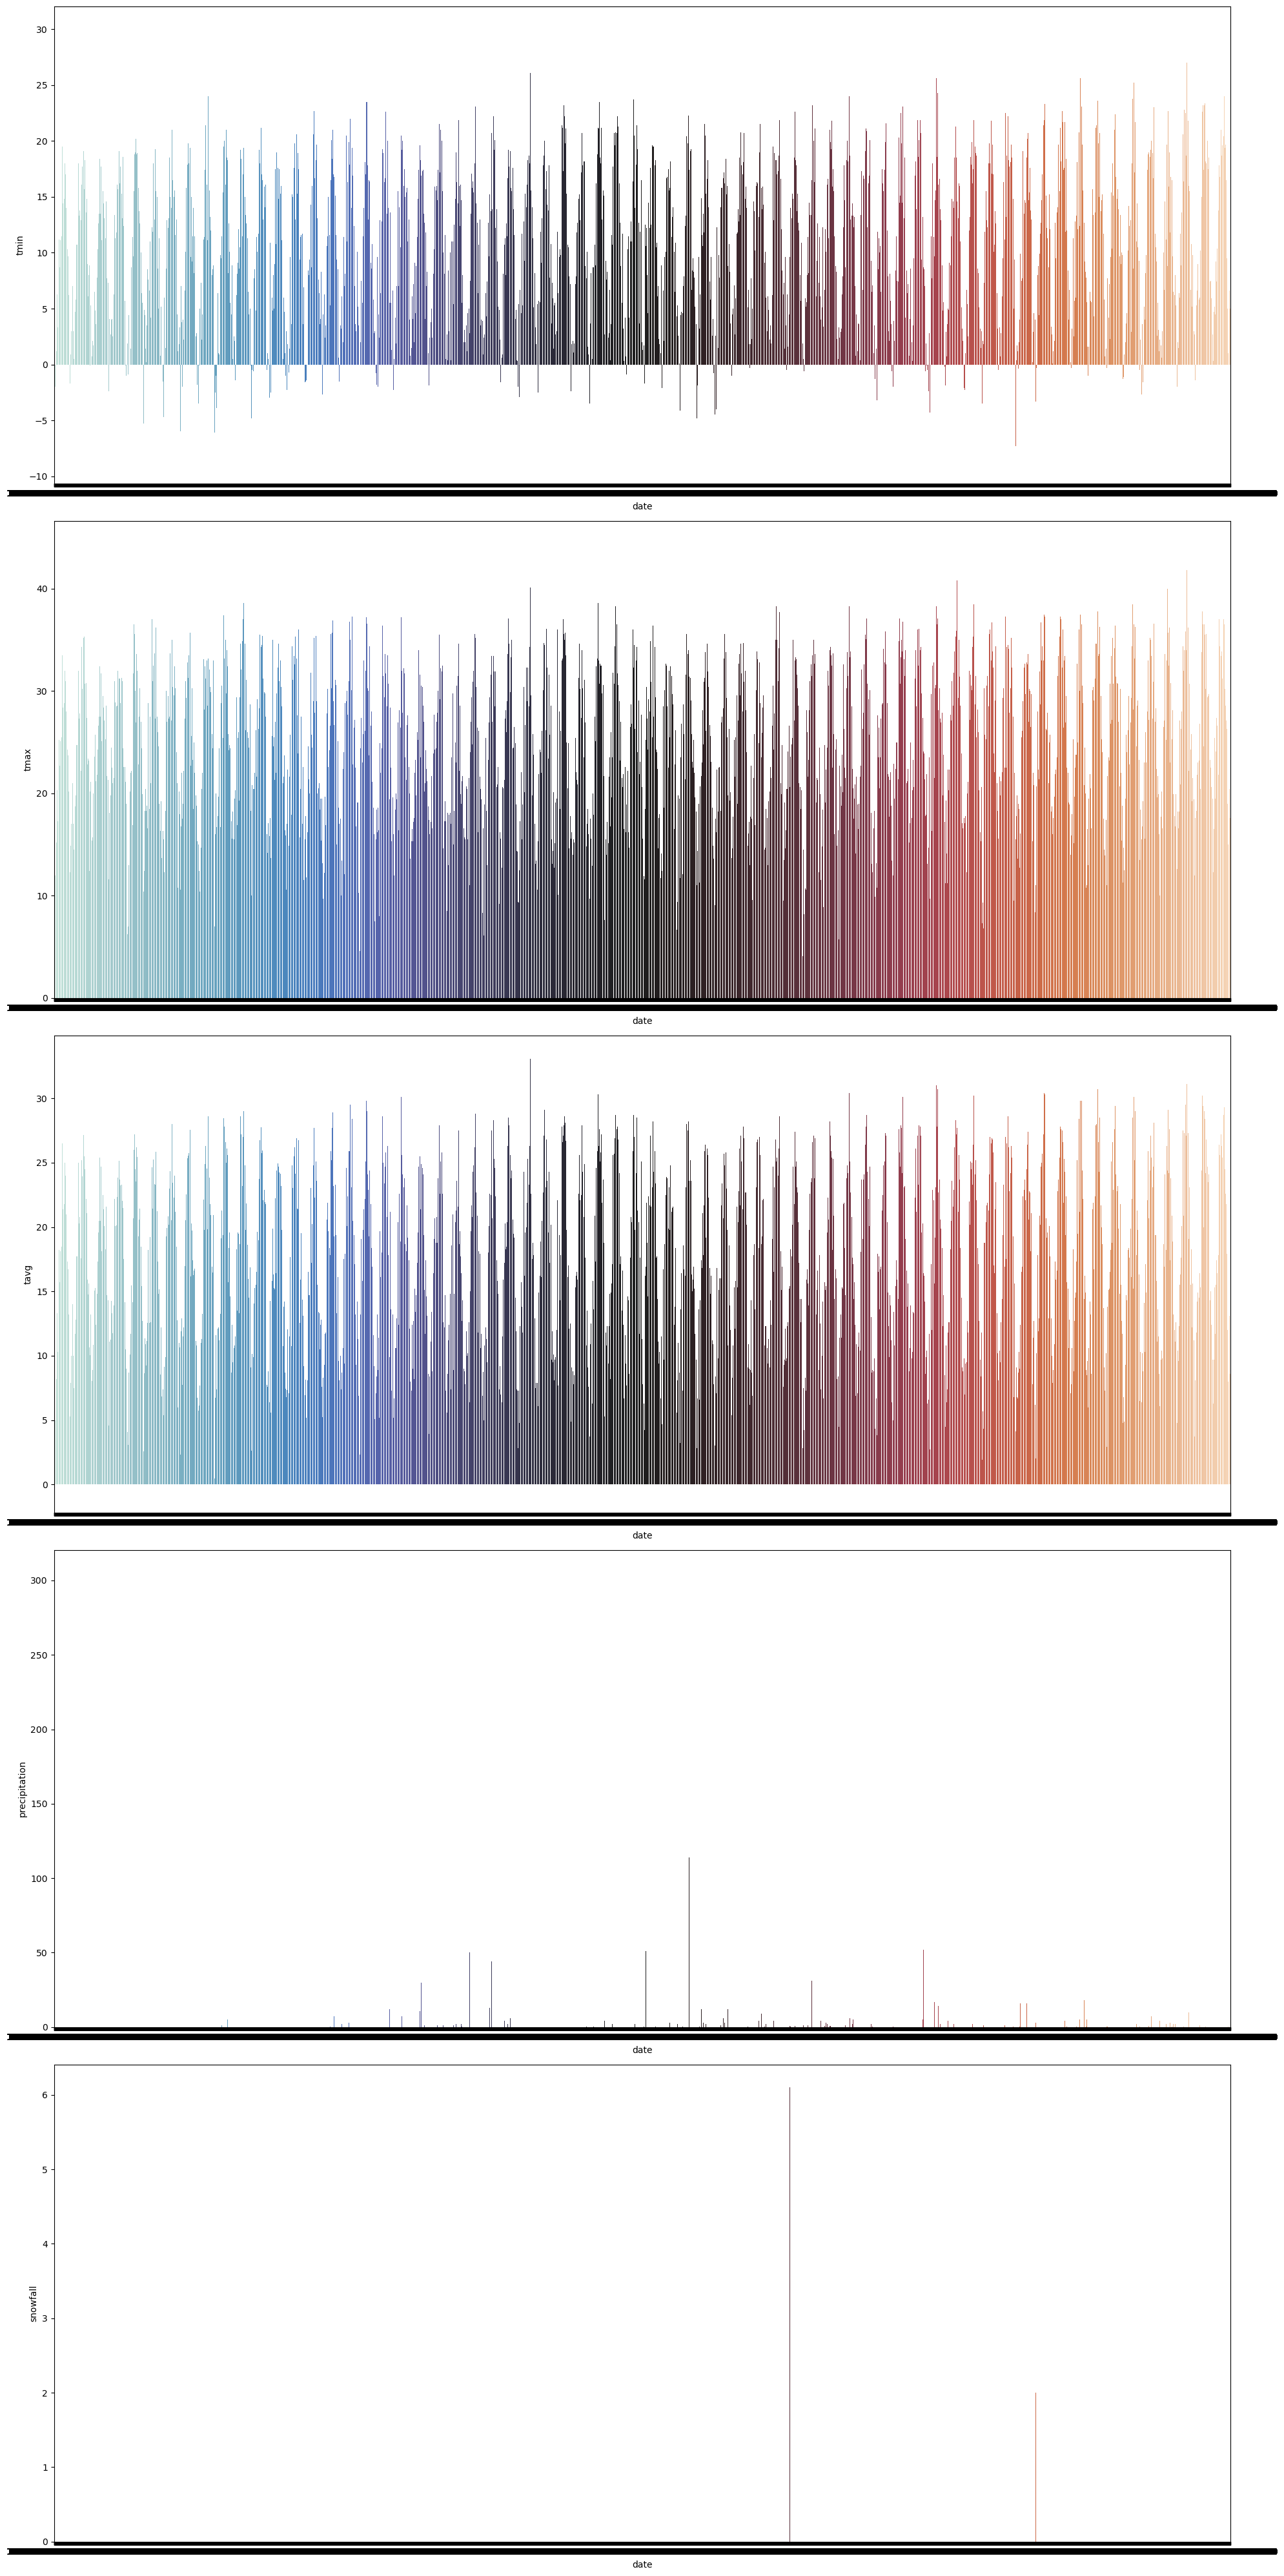

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 1, figsize=(20, 40))

sns.barplot(ax=ax[0], data=clima_full, x='date', y='tmin', palette="icefire")
sns.barplot(ax=ax[1], data=clima_full, x='date', y='tmax', palette="icefire")
sns.barplot(ax=ax[2], data=clima_full, x='date', y='tavg', palette="icefire")
sns.barplot(ax=ax[3], data=clima_full, x='date', y='precipitation', palette="icefire")
sns.barplot(ax=ax[4], data=clima_full, x='date', y='snowfall', palette="icefire")

plt.tight_layout()
plt.show()